# 0.0 Imports

In [7]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns
import matplotlib.pyplot as plt

# 0.1 Loading Data

In [8]:
df_raw = pd.read_csv('dataset/df_ready.csv')

In [9]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp_d', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

# 1.0 Data Description

In [10]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [11]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

df1.columns = cols_name

## 1.2 Data Dimensions

In [14]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 23151
Number of Cols: 20


## 1.3 Data Types

In [15]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [16]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Change Types

In [17]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.6 Descriptive Statistics 

In [18]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

### 1.6.1 Nummerical Attributes

In [19]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # variação entre o mínimo e máximo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']

# 2.0 EDA

In [20]:
df2 = df1.copy()

## 2.1 Questões de Negócio

- Qual foi a loja que mais vendeu?
- Qual a categoria mais vendida?
- Qual a marca mais vendida?
- Quais os dias mais vendem?
- Quais os meses que mais vendem?
- Quais as semanas que mais vendem?

### 2.1.1 Qual foi a loja que mais vendeu?

<Axes: xlabel='merchant', ylabel='date_imp'>

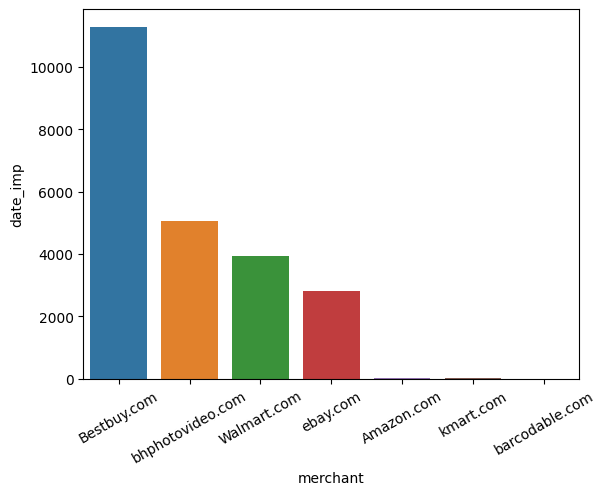

In [21]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp', data=aux1)

In [22]:
# seleção das lojas 
df_best    = df2[df2['merchant']== 'Bestbuy.com']
df_bhp     = df2[df2['merchant']== 'bhphotovideo.com']
df_walmart = df2[df2['merchant']== 'Walmart.com']
df_ebay    = df2[df2['merchant']== 'ebay.com']

### 2.1.2 Qual foi a categoria mais vendida no geral?

<Axes: xlabel='category_name', ylabel='date_imp'>

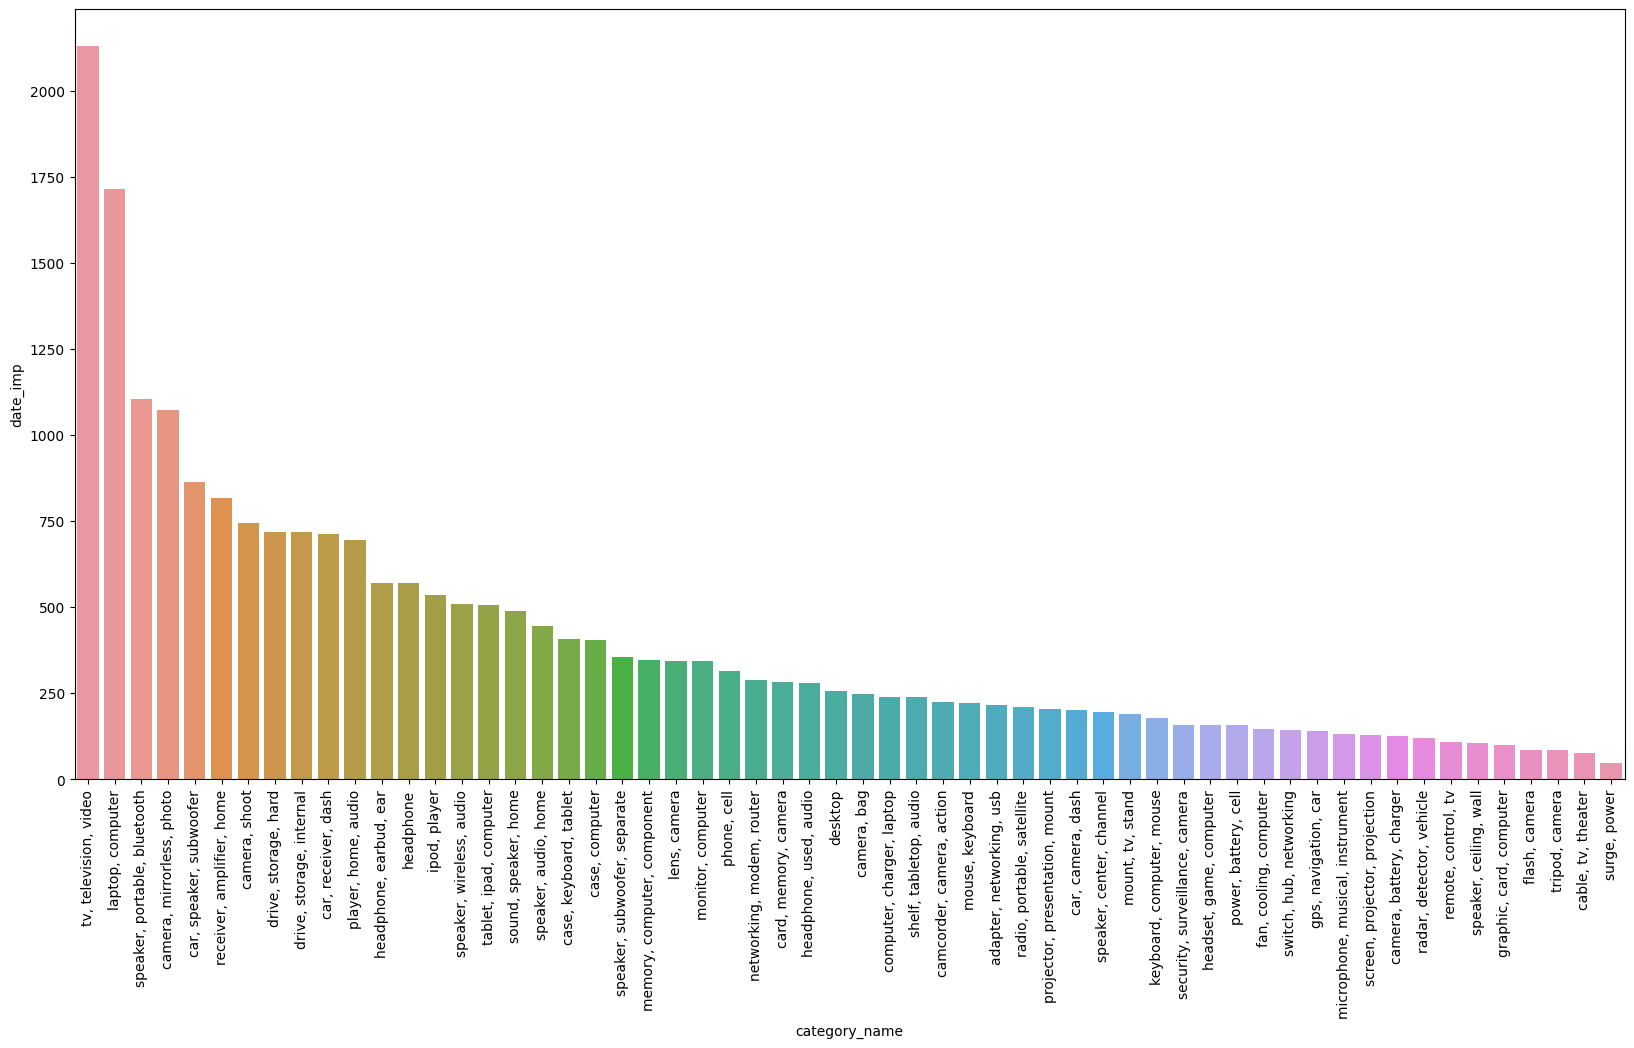

In [23]:
plt.figure(figsize=(20,10))
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp', data=aux2)

### 2.1.3 Qual a categoria mais vendida por loja?

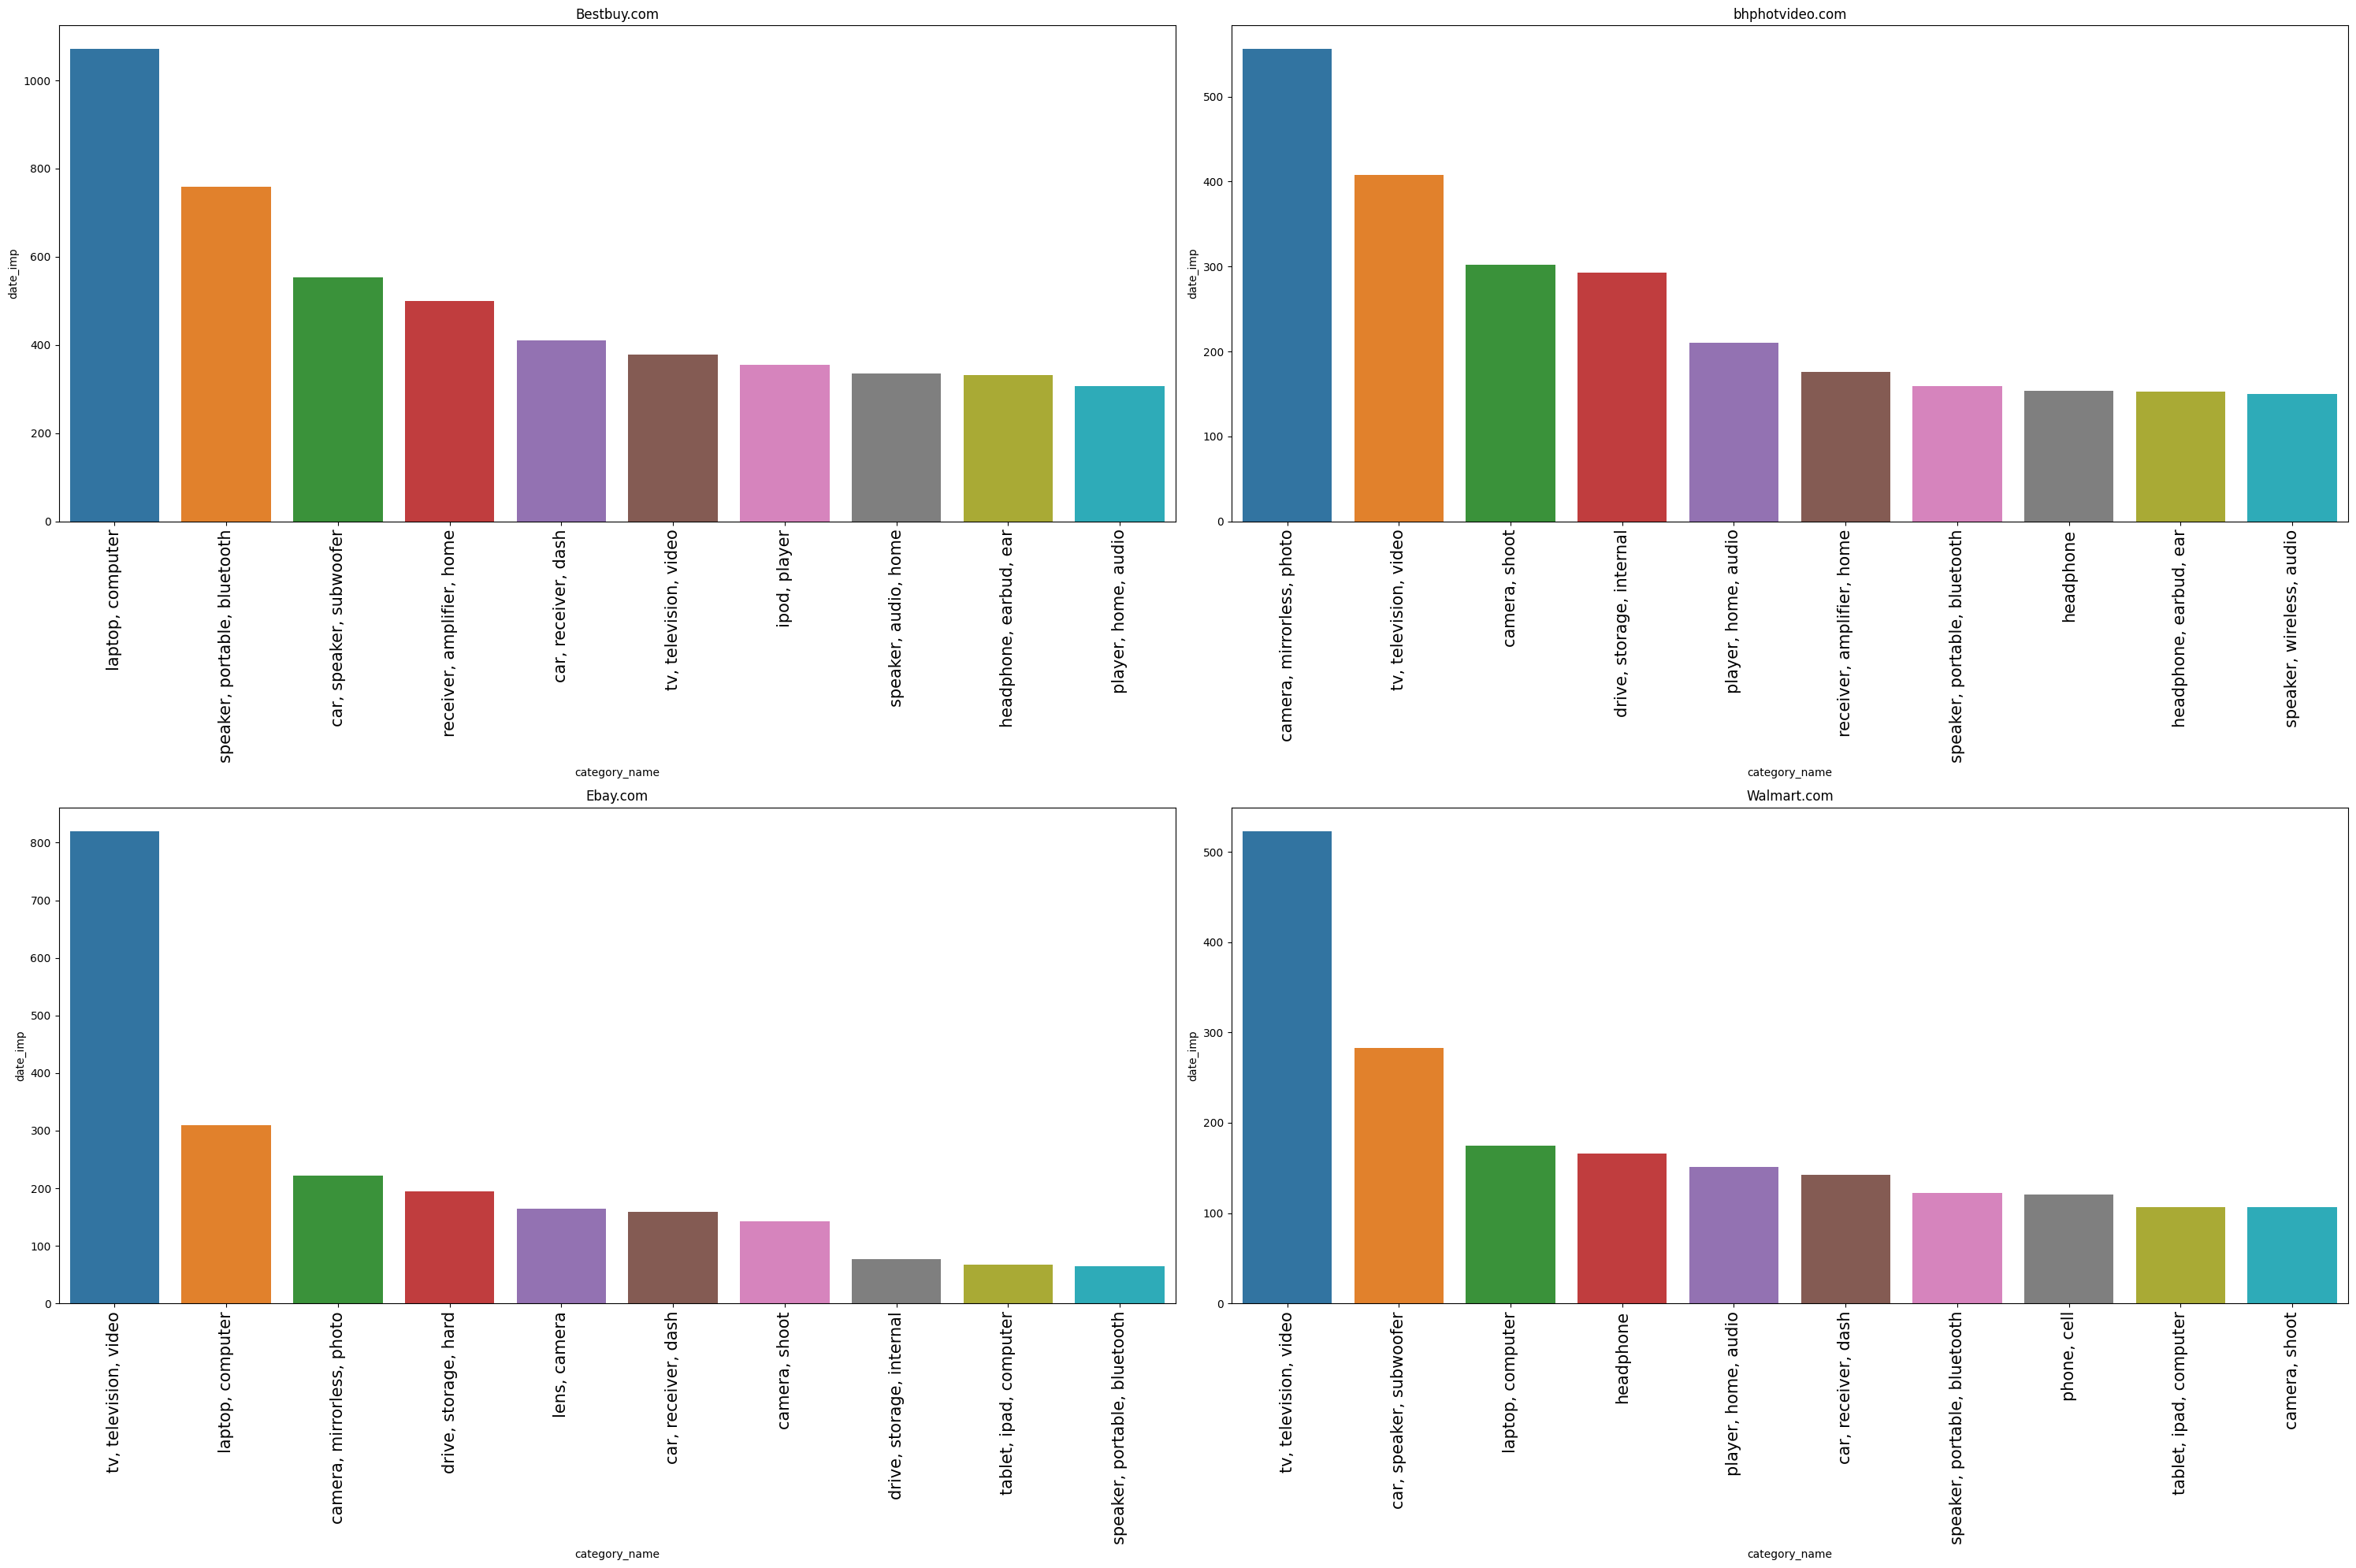

In [24]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux3 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3.head(10))

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('bhphotvideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4.head(10))

plt.subplot(2,2,3)
aux5 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5.head(10))

plt.subplot(2,2,4)
aux6 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6.head(10))

plt.tight_layout()

### 2.1.4 Qual a marca mais vendida?

<Axes: xlabel='brand', ylabel='date_imp'>

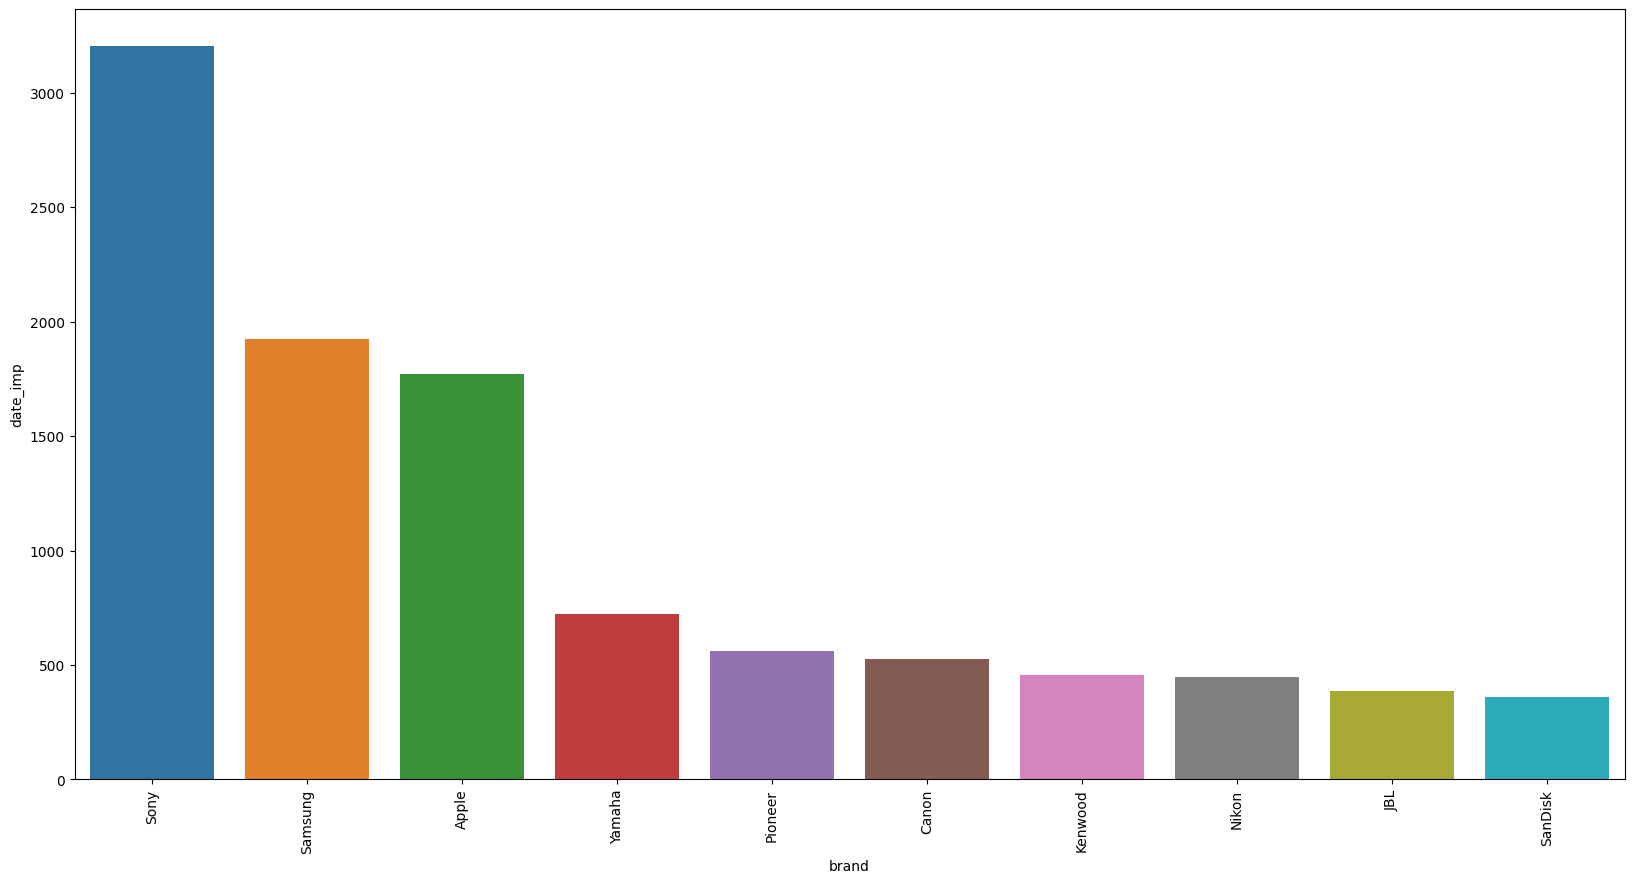

In [25]:
plt.figure(figsize=(20,10))
aux7 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp', data=aux7.head(10))

### 2.1.5 Qual a marca mais vendida por loja?

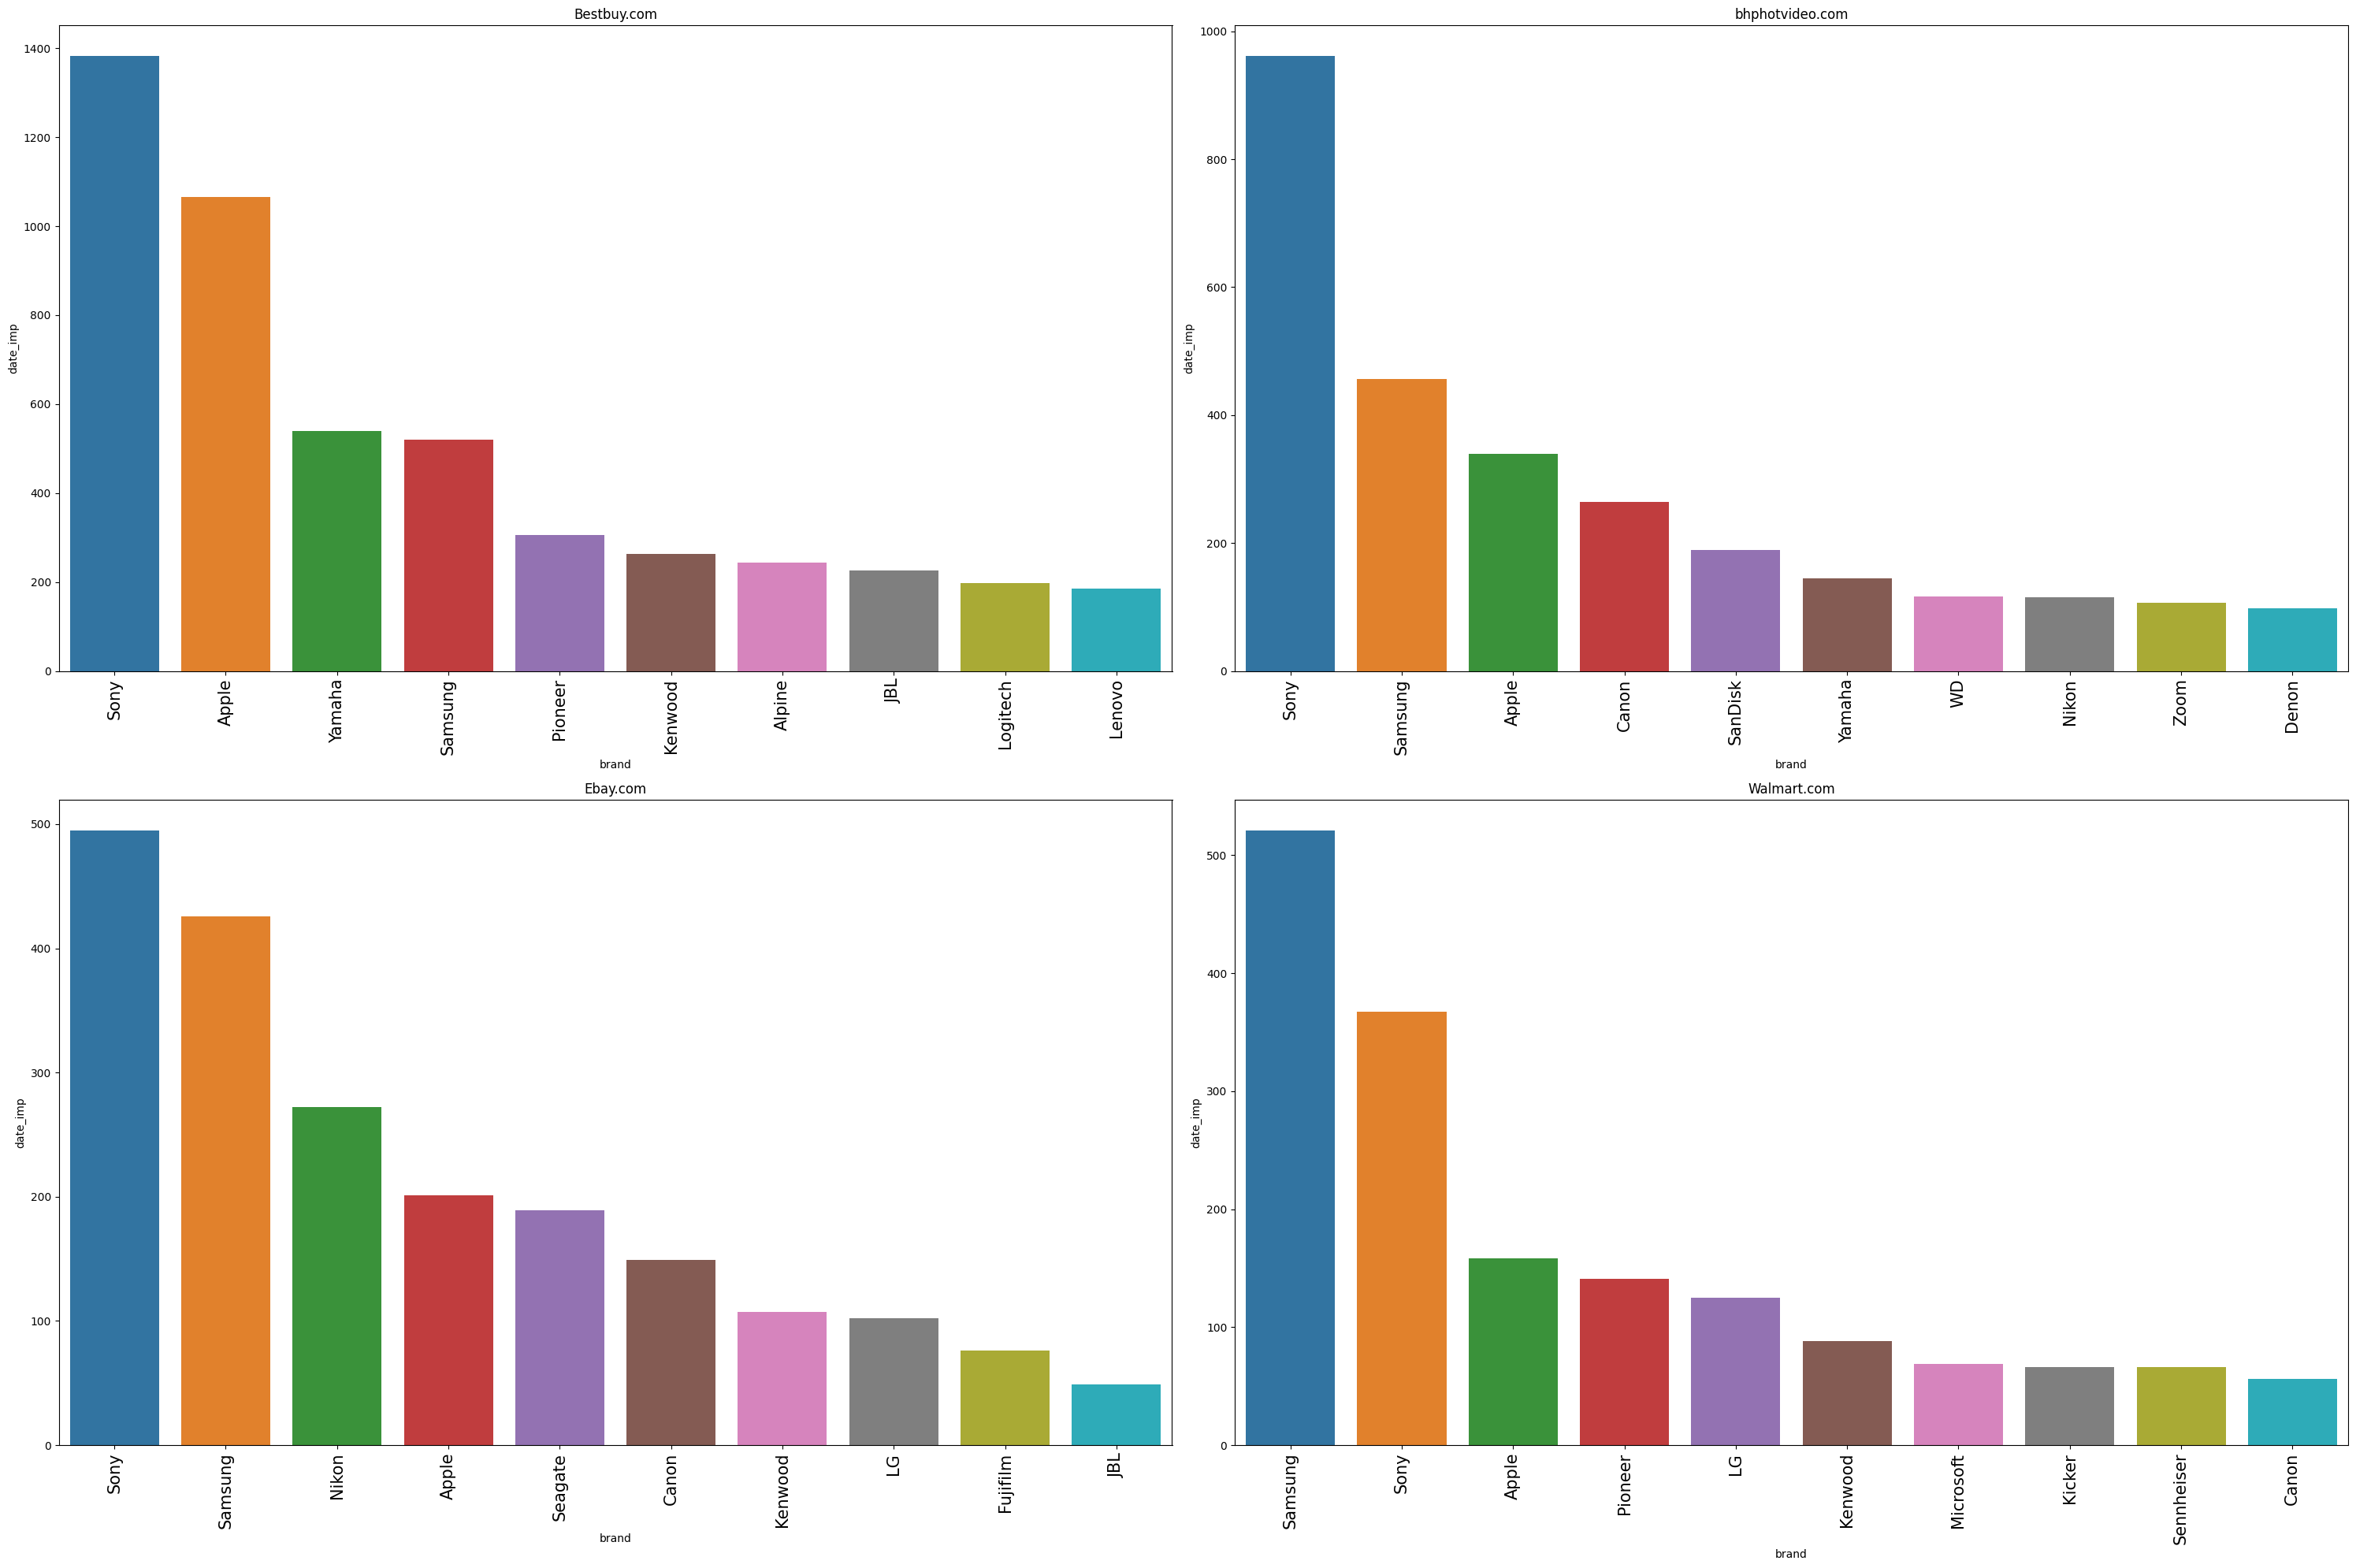

In [26]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux8 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Bestbuy.com')
sns.barplot(x='brand', y='date_imp', data=aux8.head(10))

plt.subplot(2,2,2)
aux9 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('bhphotvideo.com')
sns.barplot(x='brand', y='date_imp', data=aux9.head(10))

plt.subplot(2,2,3)
aux10 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Ebay.com')
sns.barplot(x='brand', y='date_imp', data=aux10.head(10))

plt.subplot(2,2,4)
aux11 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Walmart.com')
sns.barplot(x='brand', y='date_imp', data=aux11.head(10))

plt.tight_layout()

### 2.1.6 Quais os dias mais vendem?

<Axes: xlabel='day_n', ylabel='date_imp'>

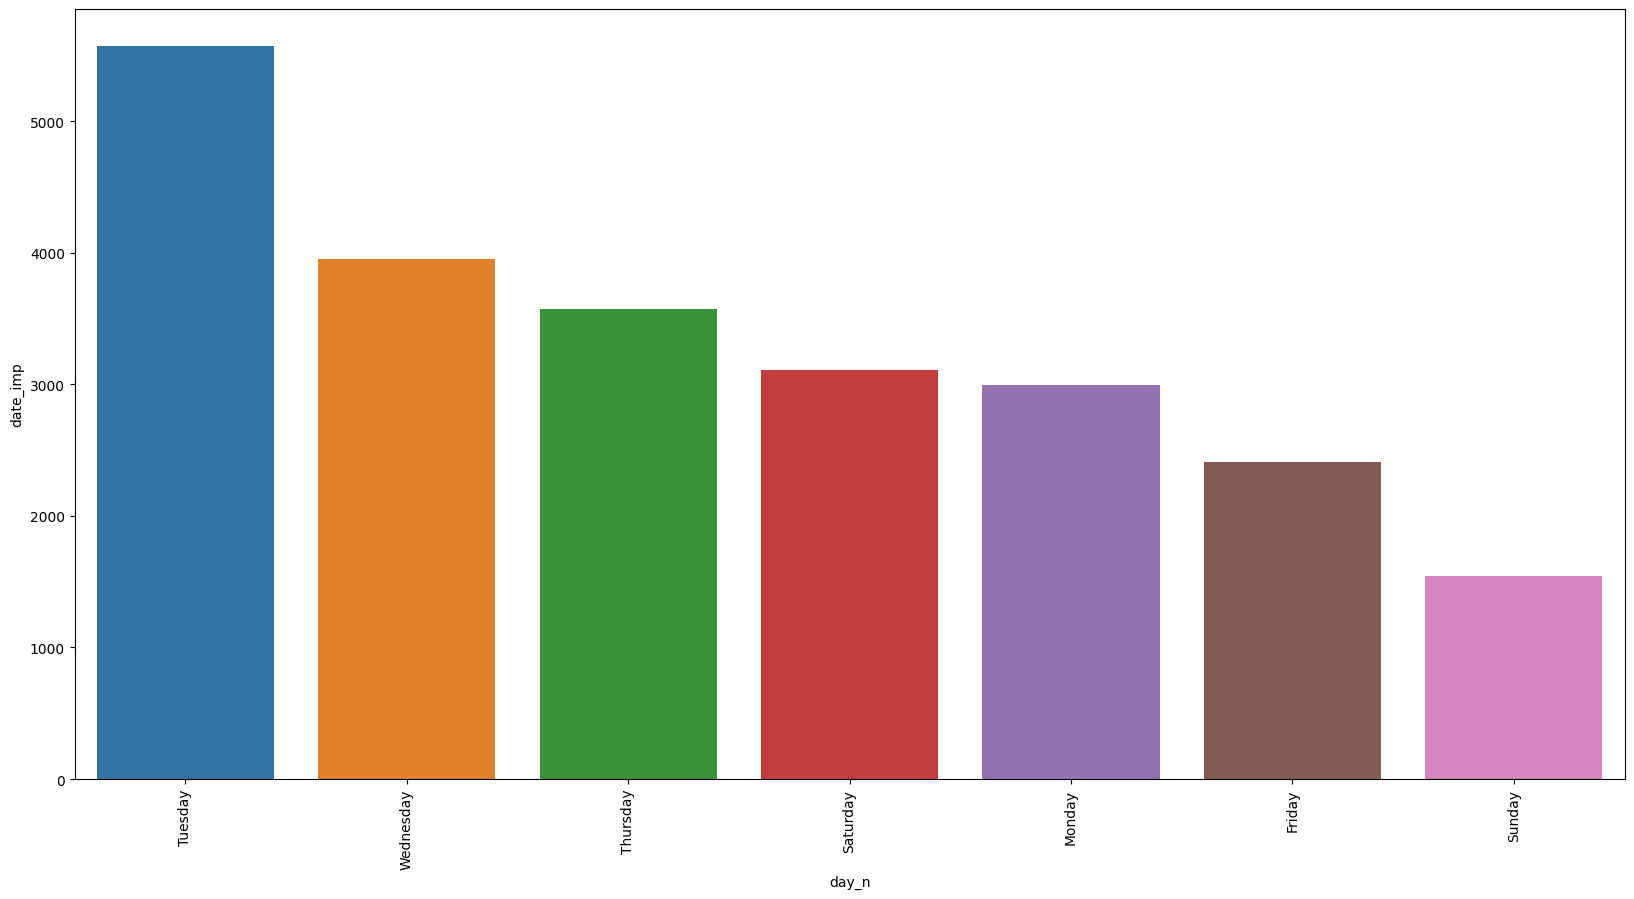

In [27]:
plt.figure(figsize=(20,10))
aux12 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp', data=aux12)

### 2.1.7 Quais os dias mais vendem por loja?

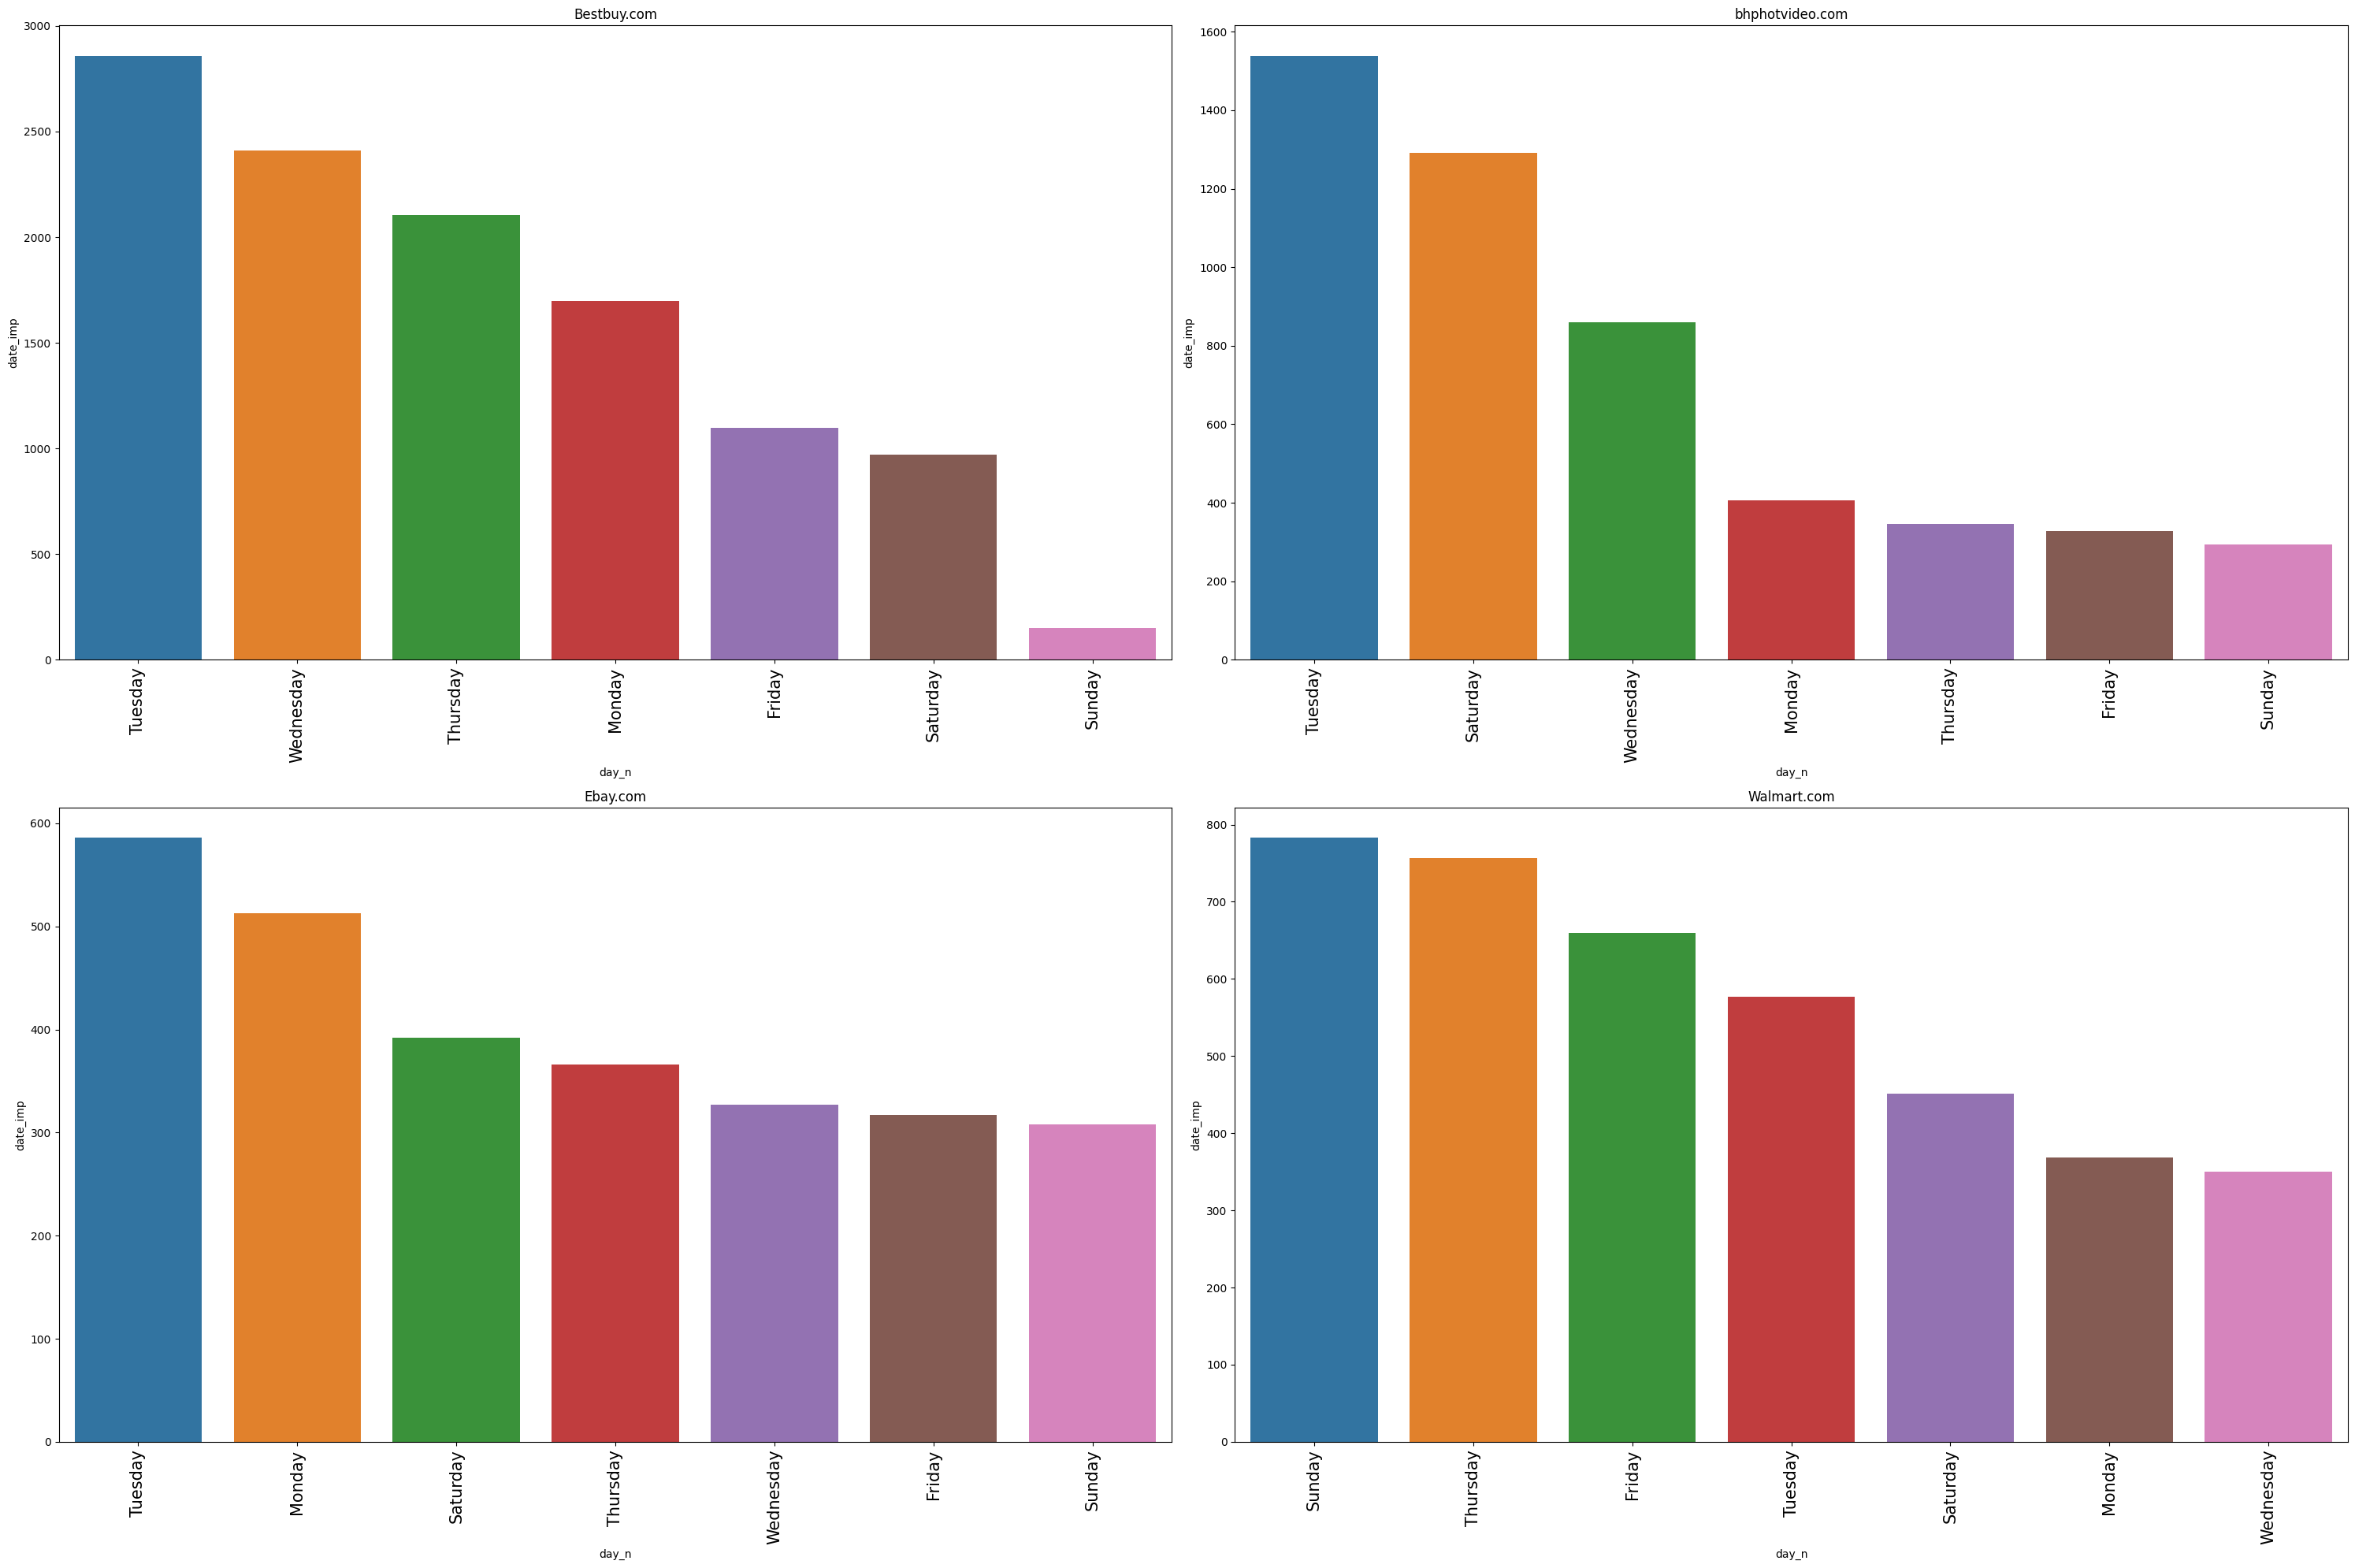

In [28]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux13 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Bestbuy.com')
sns.barplot(x='day_n', y='date_imp', data=aux13)

plt.subplot(2,2,2)
aux14 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('bhphotvideo.com')
sns.barplot(x='day_n', y='date_imp', data=aux14)

plt.subplot(2,2,3)
aux15 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Ebay.com')
sns.barplot(x='day_n', y='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Walmart.com')
sns.barplot(x='day_n', y='date_imp', data=aux16)

plt.tight_layout()

### 2.1.8 Quais os meses que mais vendem?

<Axes: xlabel='month_n', ylabel='date_imp'>

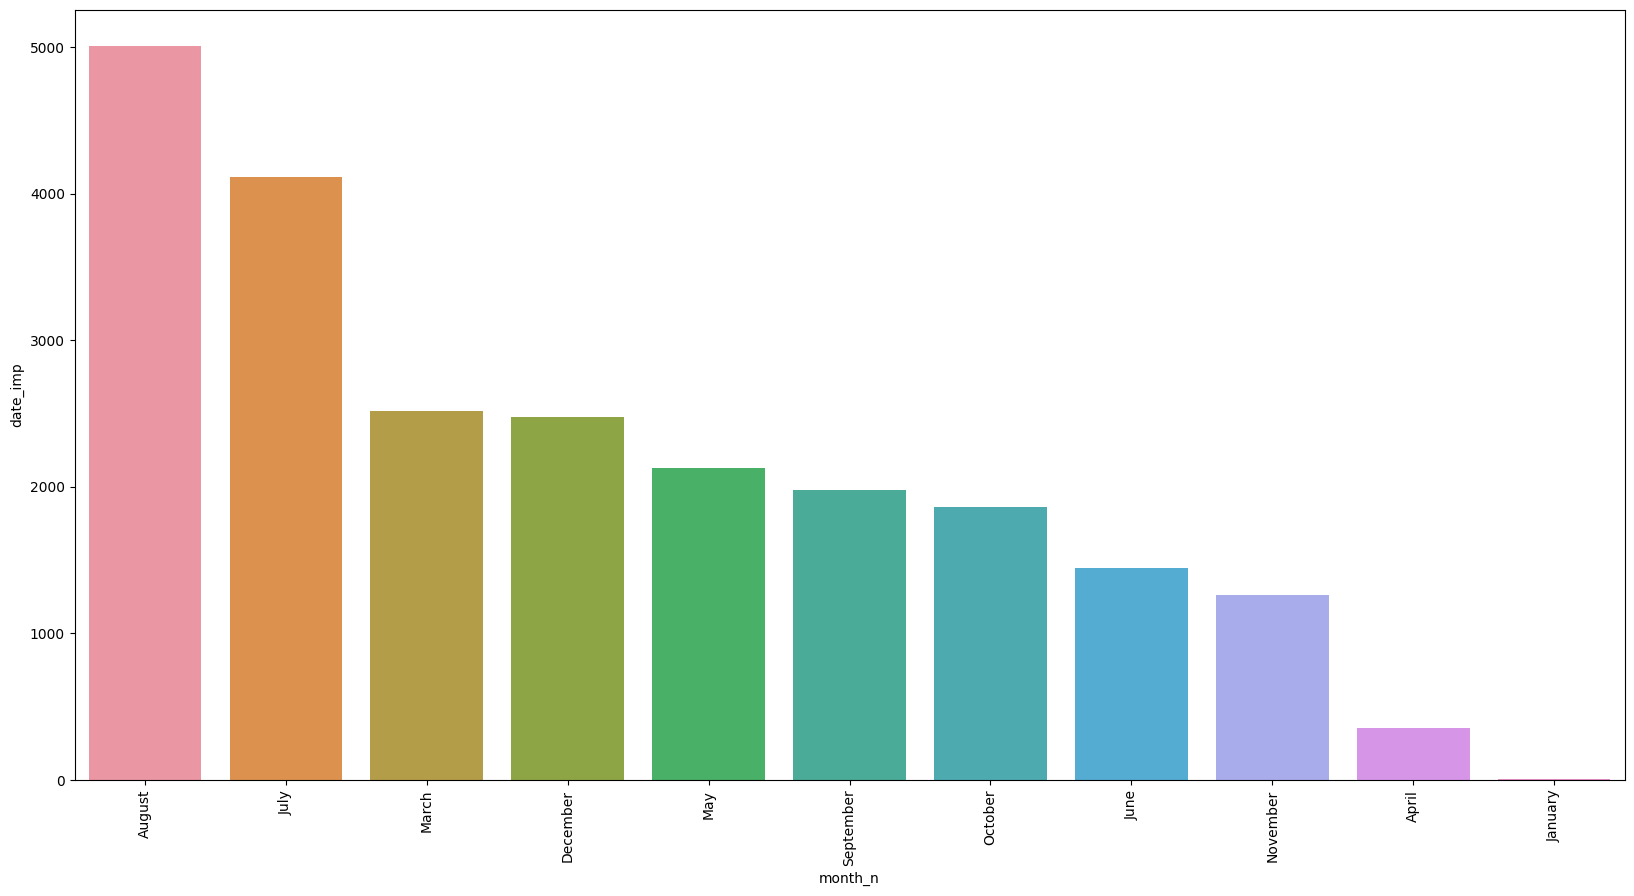

In [29]:
plt.figure(figsize=(20,10))
aux17 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='month_n', y='date_imp', data=aux17)

### 2.1.9 Quais os meses que mais vendem por loja?

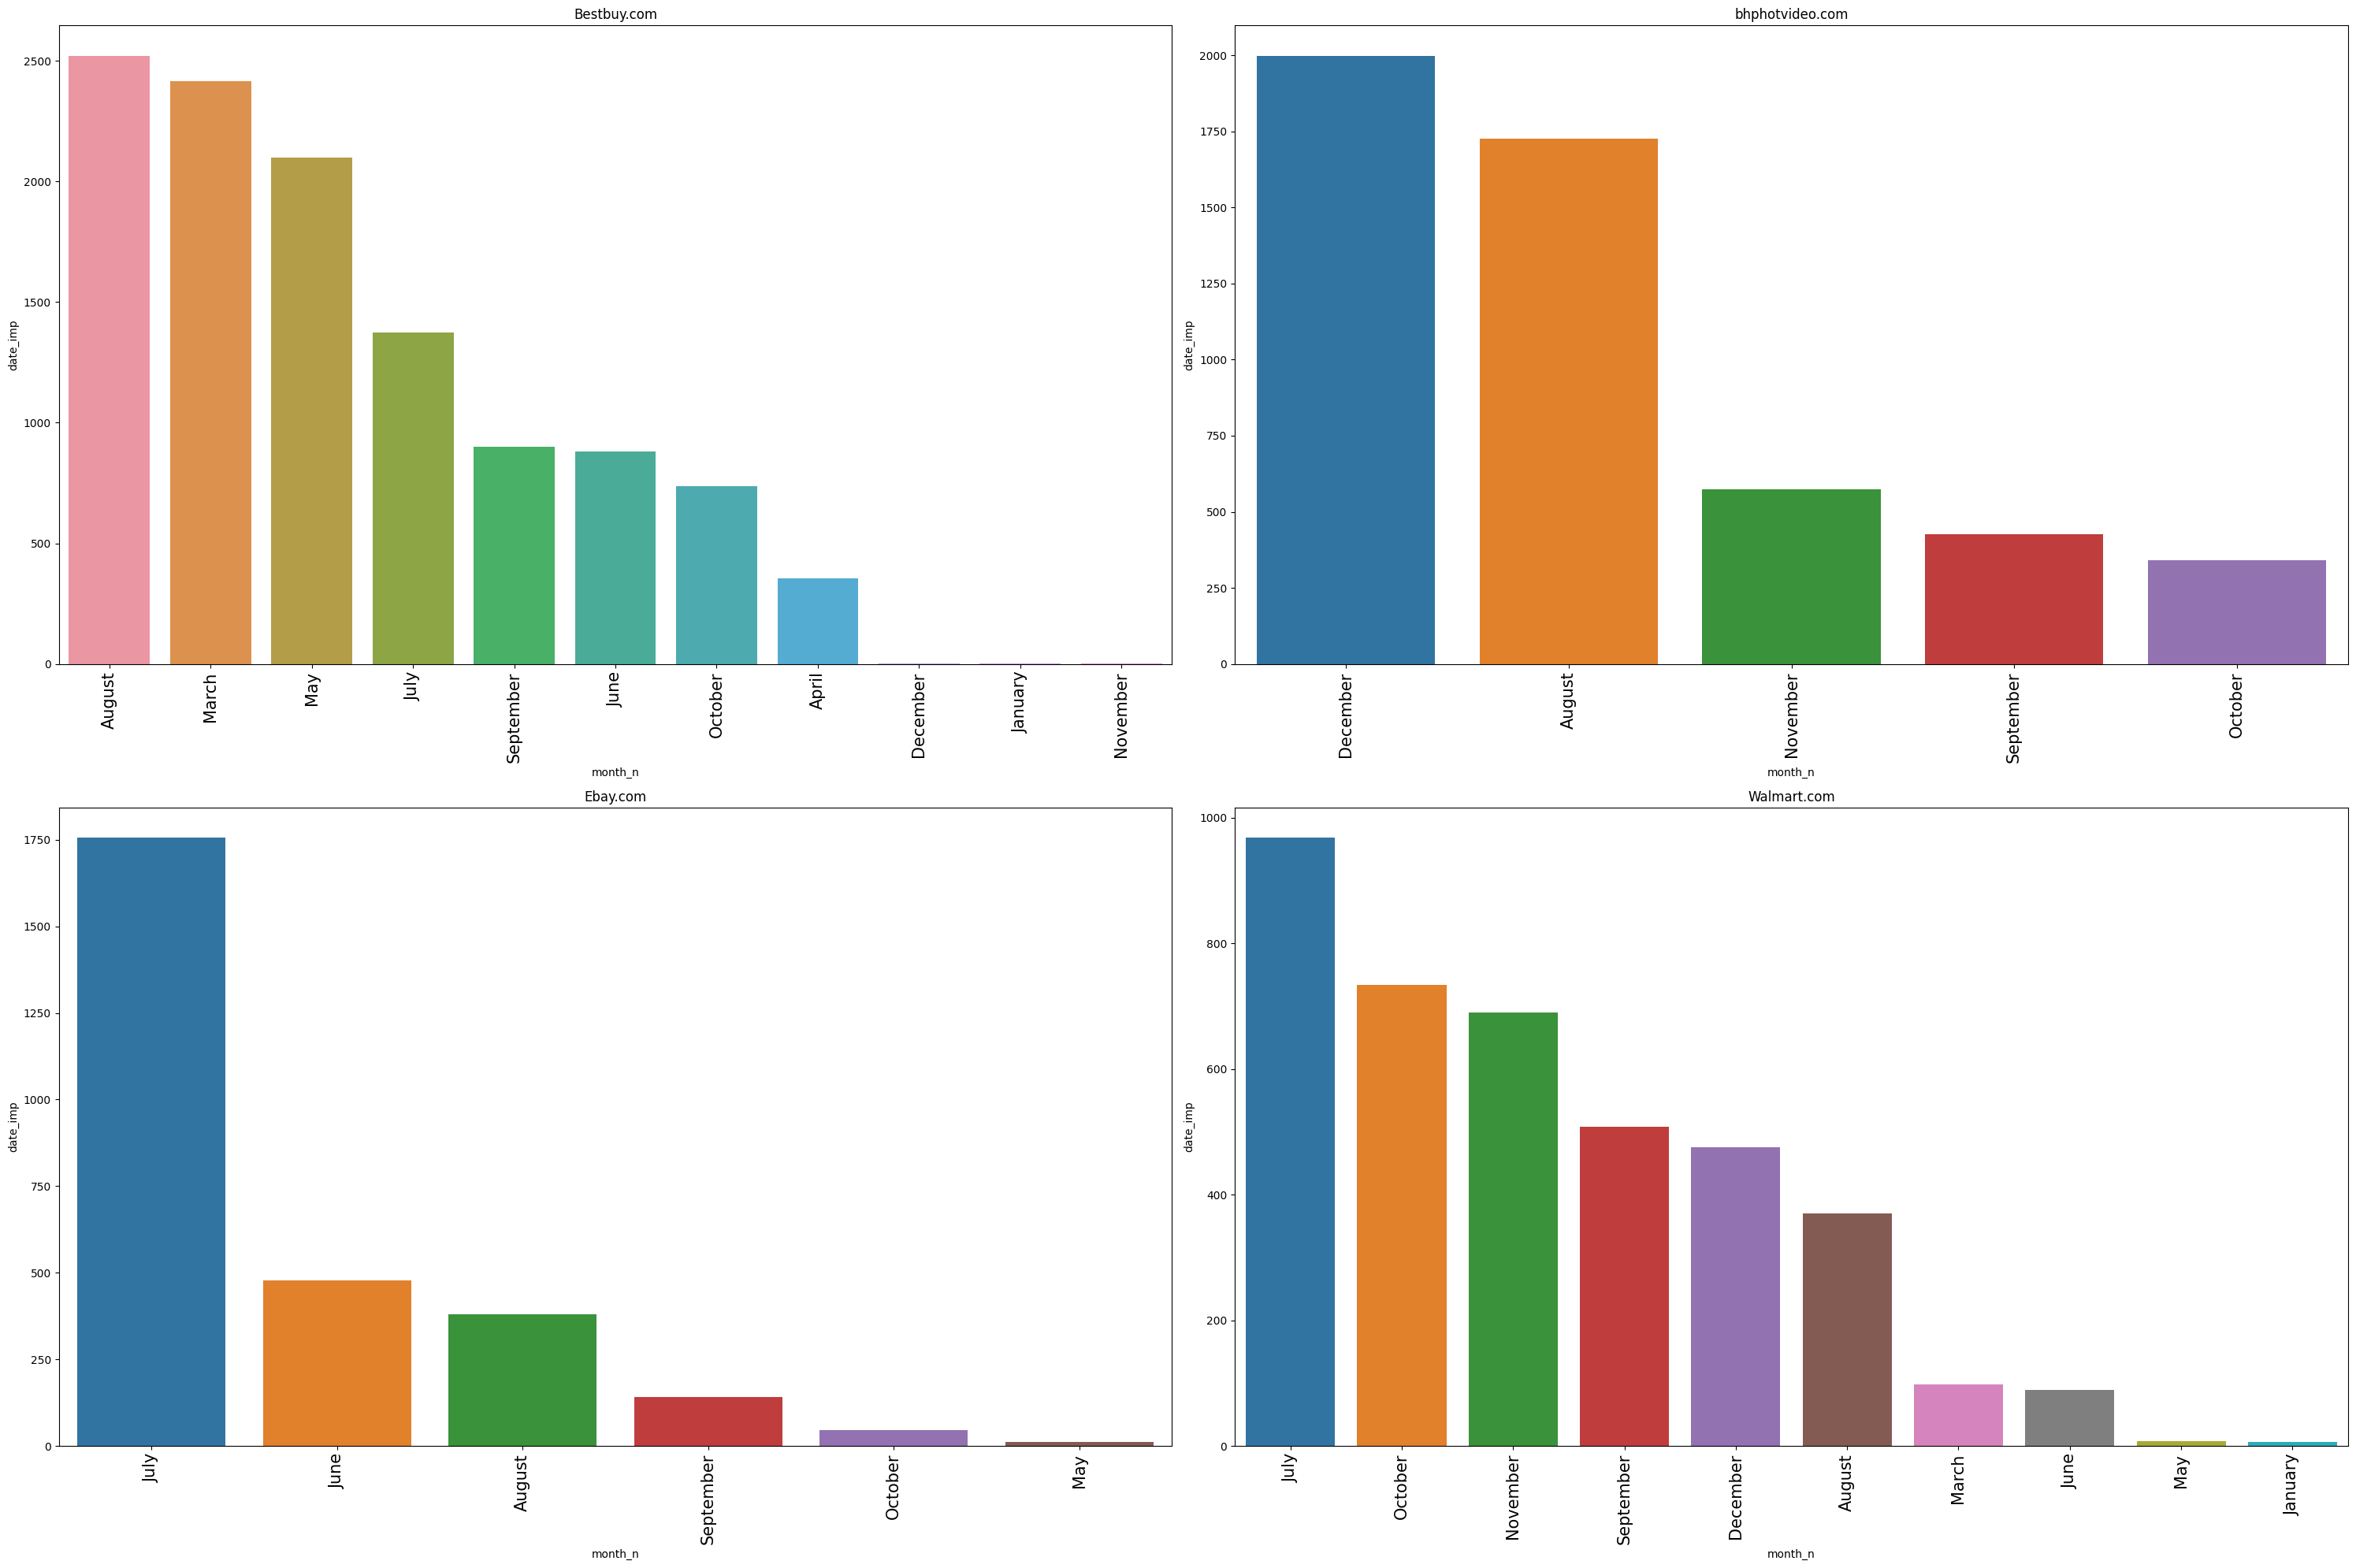

In [30]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux18 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Bestbuy.com')
sns.barplot(x='month_n', y='date_imp', data=aux18)

plt.subplot(2,2,2)
aux19 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('bhphotvideo.com')
sns.barplot(x='month_n', y='date_imp', data=aux19)

plt.subplot(2,2,3)
aux20 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Ebay.com')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Walmart.com')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

### 2.1.10 Quais as semanas que mais vendem?

<Axes: xlabel='week_number', ylabel='date_imp'>

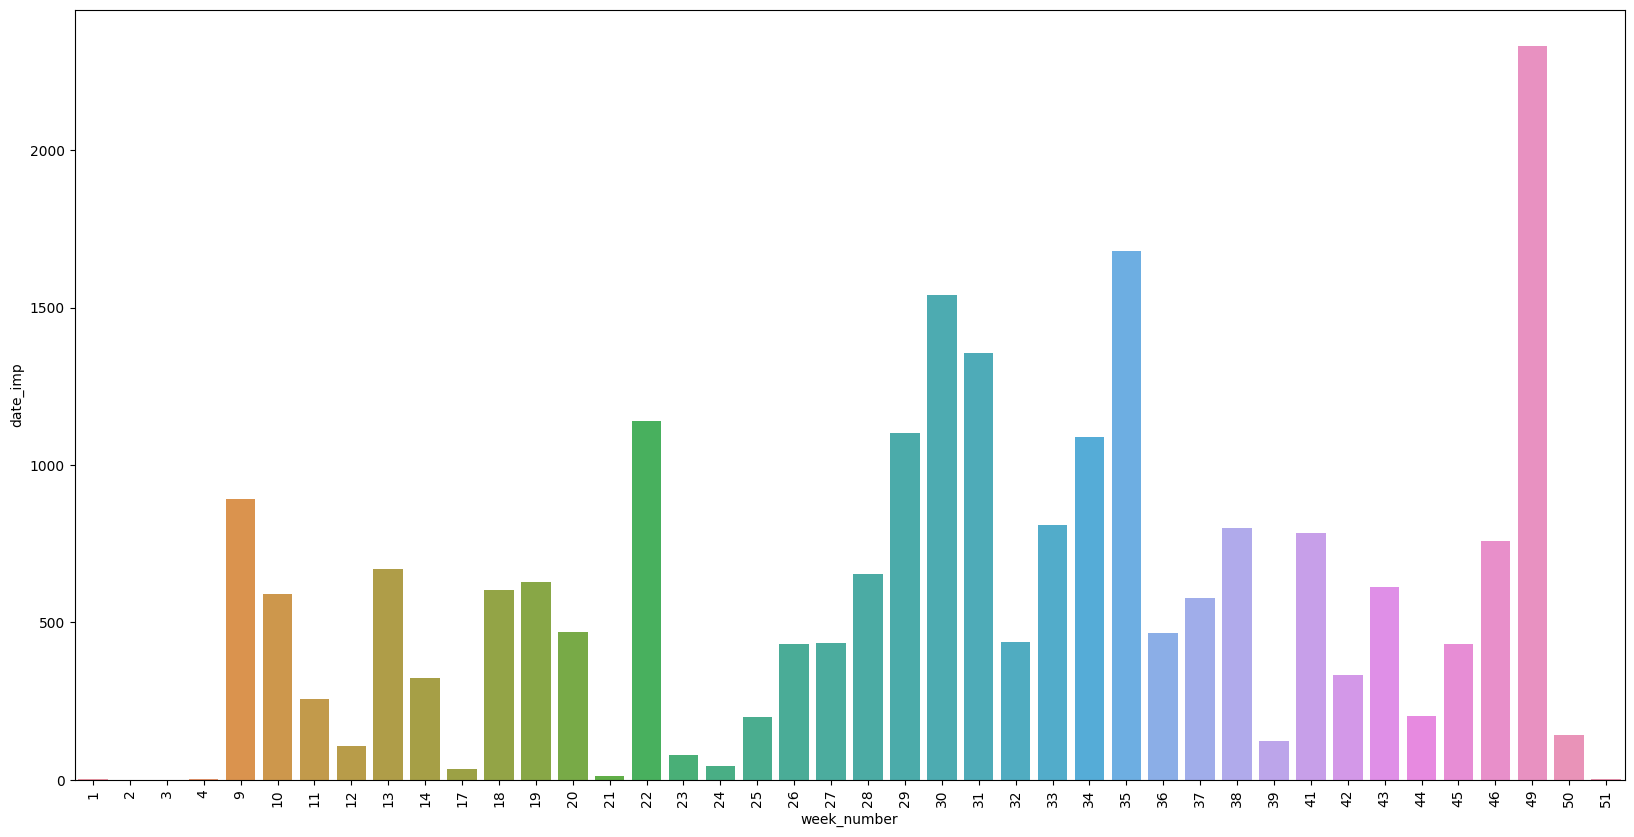

In [31]:
plt.figure(figsize=(20,10))
aux22 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp', data=aux22)

### 2.1.11 Quais as semanas que mais vendem por loja?

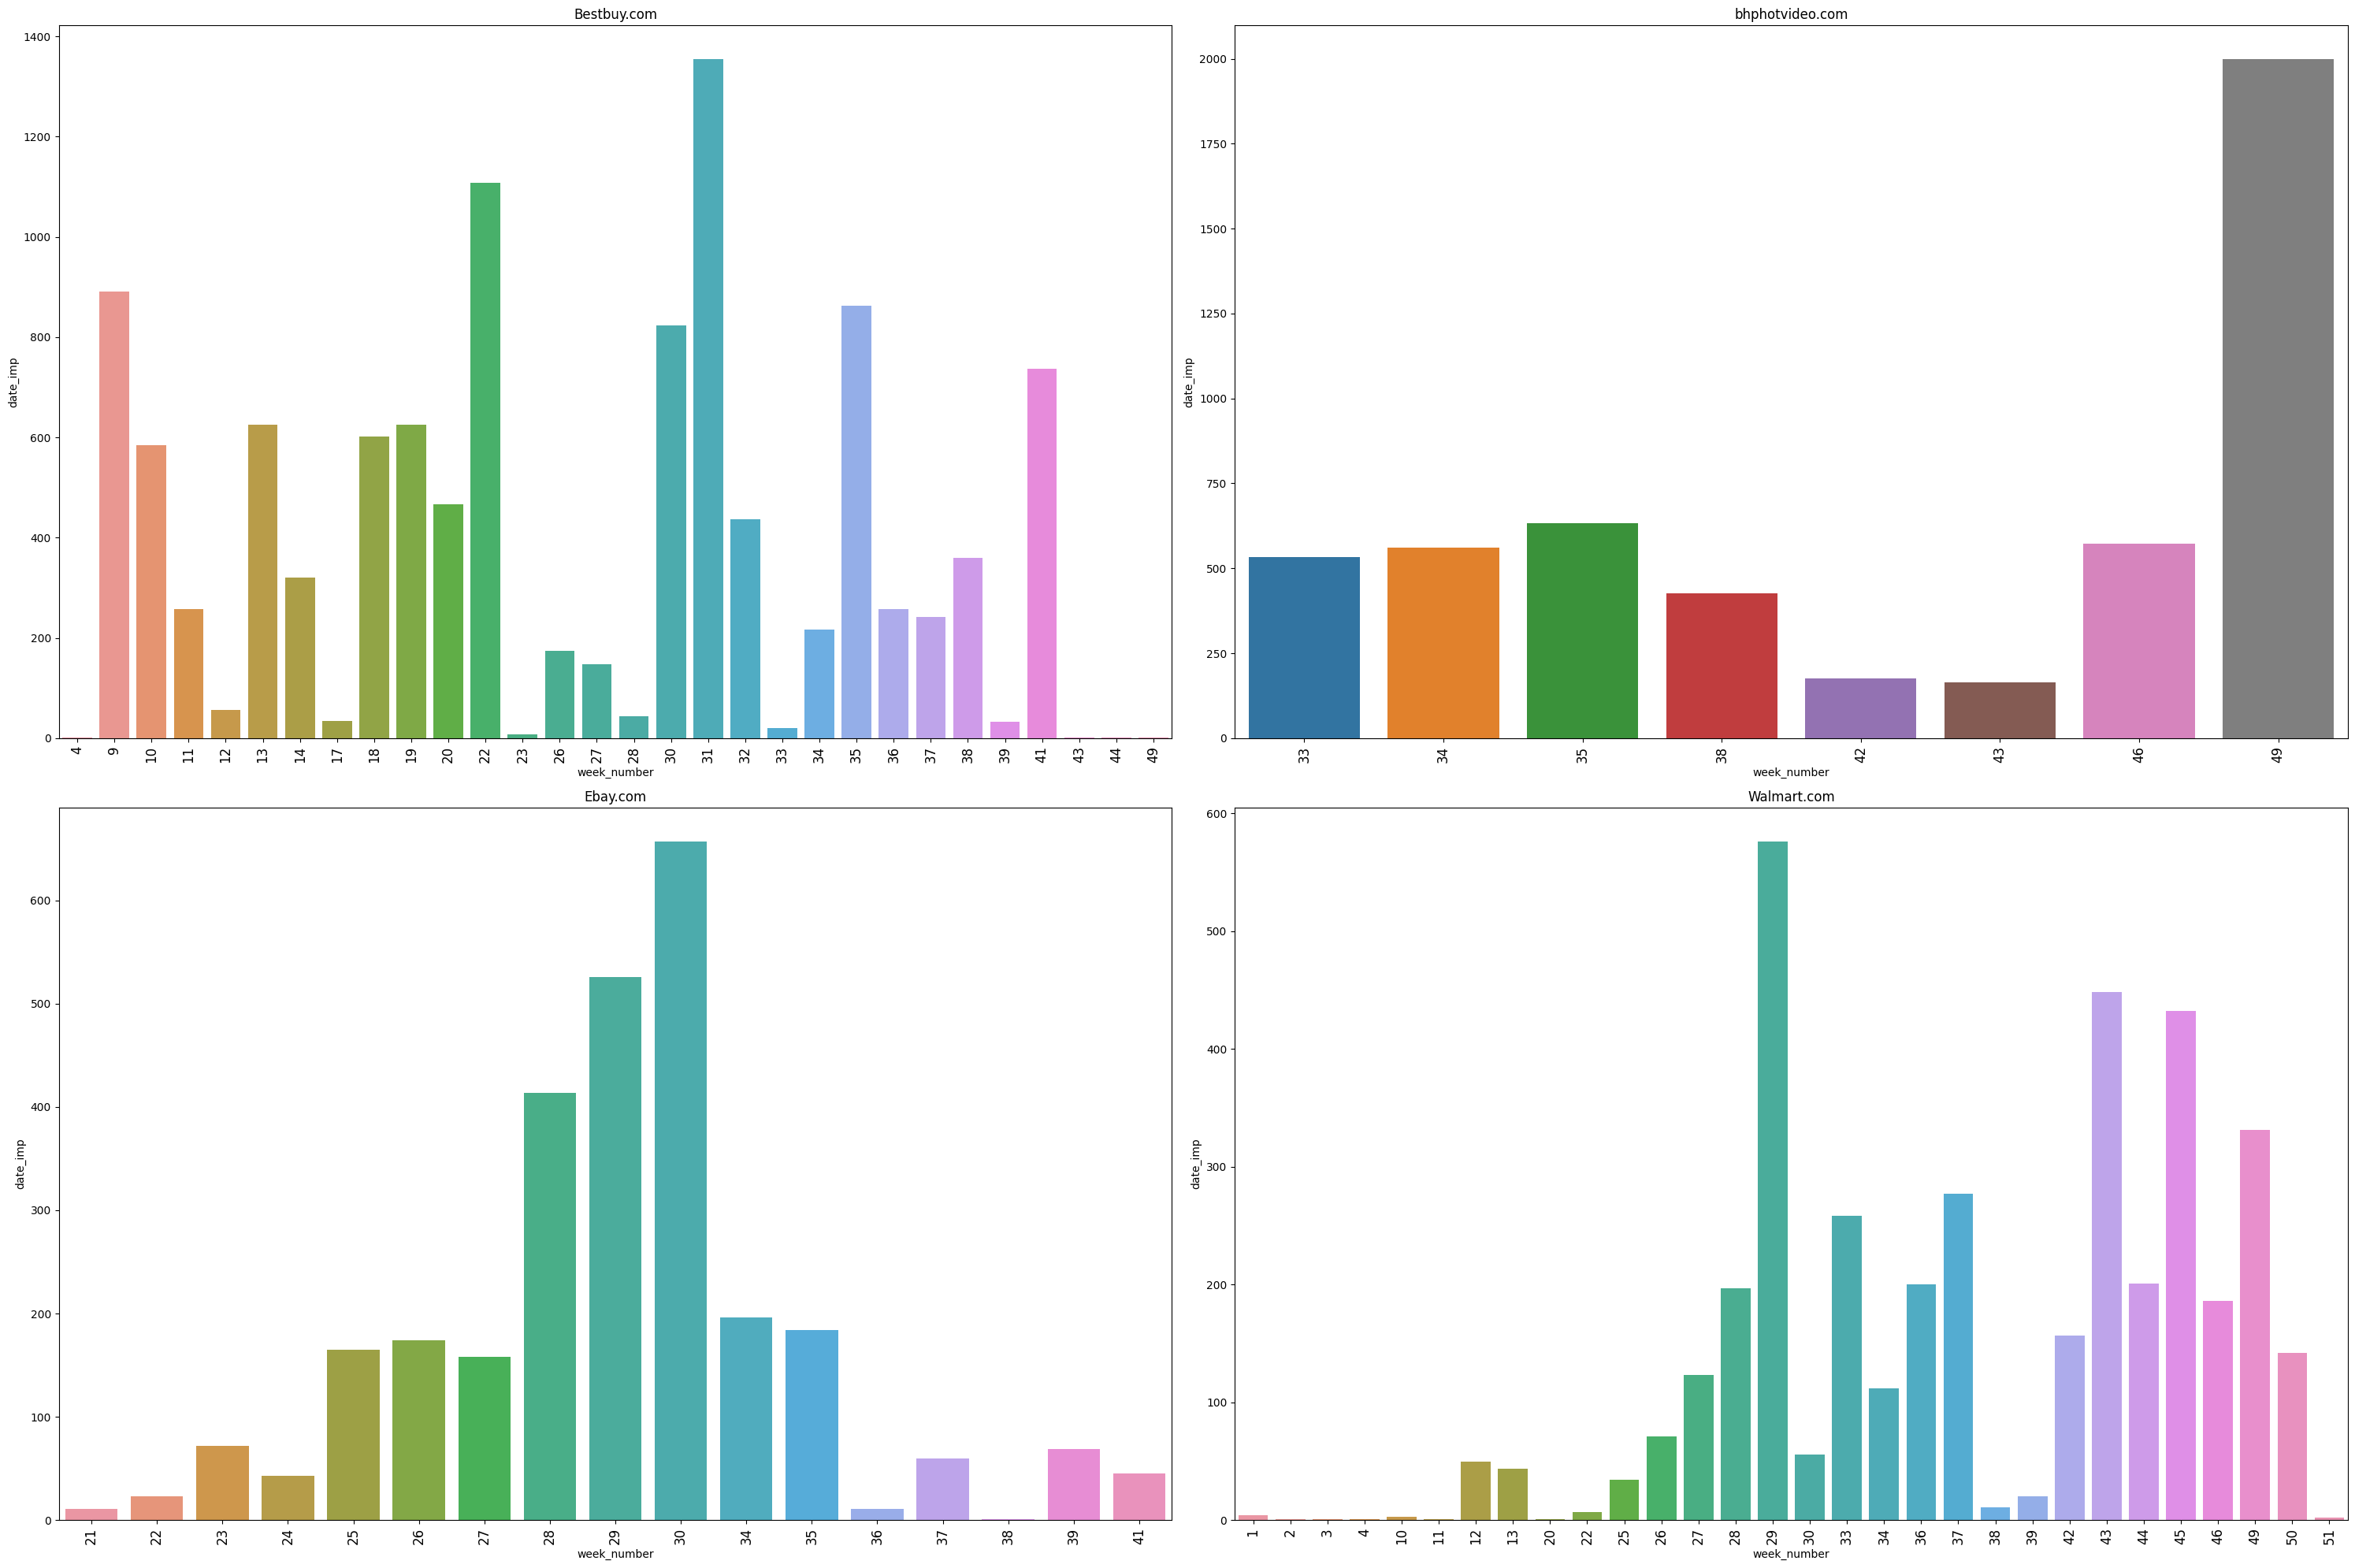

In [32]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux23 = df_best[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='week_number', y='date_imp', data=aux23)

plt.subplot(2,2,2)
aux24 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='week_number', y='date_imp', data=aux24)

plt.subplot(2,2,3)
aux25 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()

# 3.0 Feature Engineering

In [33]:
df3 = df2.copy()

In [84]:
df_laptop = df_best[df_best['category_name'] == 'laptop, computer']

In [85]:
df_laptop.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
dateadded            0
dateseen             0
dateupdated          0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [86]:
test = df_laptop.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date_imp': 'count'}).reset_index()

In [87]:
#criando dataframe dos valores(x)

x_price = test.pivot(index= 'week_number' , columns= 'name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,...,799.99,499.99,NaN,664.99,379.99,316.99,NaN,807.49,NaN,617.49
2,10,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,238.995,...,819.99,429.99,229.99,664.99,474.99,335.99,NaN,949.99,NaN,617.49
3,11,NaN,NaN,NaN,NaN,2715.99,2482.99,NaN,NaN,NaN,...,819.99,NaN,218.49,NaN,474.99,383.99,NaN,NaN,NaN,569.99
4,13,NaN,NaN,449.000,NaN,2547.99,2353.99,NaN,849.99,223.995,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,NaN,591.49


In [88]:
y_demand = test.pivot(index= 'week_number' , columns= 'name', values='date_imp')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,...,1.0,2.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,2.0
2,10,NaN,NaN,2.0,NaN,1.0,4.0,NaN,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0
3,11,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,...,1.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,2.0
4,13,NaN,NaN,1.0,NaN,2.0,8.0,NaN,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0


# 4.0 Data Description of new data

## 4.1 Data Description

In [89]:
print(f'Number of rows: {x_price.shape[0]}')
print(f'Number of columns: {x_price.shape[1]}')

Number of rows: 26
Number of columns: 40


In [90]:
print(f'Number of rows: {y_demand.shape[0]}')
print(f'Number of columns: {y_demand.shape[1]}')

Number of rows: 26
Number of columns: 40


## 4.2 Data Types

In [91]:
x_price.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

In [92]:
y_demand.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

## 4.3 Check NA

In [93]:
x_price.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

In [94]:
y_demand.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

## 4.4 Replace NA

In [95]:
# substituindo os NA's assumindo a mediana de valor para preencher os dados faltantes

a = np.round(x_price.median(), 2)
x_price.fillna(a, inplace=True)
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,1551.99,1299.99,415.500,949.99,2618.99,2353.99,304.99,829.99,249.000,...,819.99,463.74,218.49,601.49,415.99,337.49,2399.99,853.74,4179.99,610.99
1,9,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,236.495,...,799.99,499.99,218.49,664.99,379.99,316.99,2399.99,807.49,4179.99,617.49
2,10,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,238.995,...,819.99,429.99,229.99,664.99,474.99,335.99,2399.99,949.99,4179.99,617.49
3,11,1551.99,1299.99,415.500,949.99,2715.99,2482.99,304.99,829.99,249.000,...,819.99,463.74,218.49,601.49,474.99,383.99,2399.99,853.74,4179.99,569.99
4,13,1551.99,1299.99,449.000,949.99,2547.99,2353.99,304.99,849.99,223.995,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,4179.99,591.49


In [96]:
# assumindo 0 para os dados faltantes da demanda assumindo que, se tiver NA, náo houve venda

y_demand.fillna(0, inplace=True)
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,4.0,0.0,3.0,6.0,0.0,2.0,4.0,...,1.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,2.0
2,10,0.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0
3,11,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
4,13,0.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0


## 4.5 Descriptive Statistics

In [97]:
# central tendency
ct1_x = pd.DataFrame(x_price.apply(np.mean) ).T   # média
ct2_x = pd.DataFrame(x_price.apply(np.median) ).T  # mediana

# dispersion
d1_x = pd.DataFrame(x_price.apply(np.std) ).T # Desvio padrão
d2_x = pd.DataFrame(x_price.apply(min) ).T # valor mínimo
d3_x = pd.DataFrame(x_price.apply(max) ).T # valor máximo
d4_x = pd.DataFrame(x_price.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máximo valor
d5_x = pd.DataFrame(x_price.apply( lambda x: x.skew())).T #skewness
d6_x = pd.DataFrame(x_price.apply( lambda x : x.kurtosis())).T # kurtosis

m_x = pd.concat( [d2_x, d3_x, d4_x, ct1_x, ct2_x, d1_x, d5_x, d6_x]).T.reset_index()
m_x.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
#m_x

In [98]:
# central tendency
ct1_y = pd.DataFrame(y_demand.apply(np.mean) ).T   # média
ct2_y = pd.DataFrame(y_demand.apply(np.median) ).T  # mediana

# dispersion
d1_y = pd.DataFrame(y_demand.apply(np.std) ).T # Desvio padrão
d2_y = pd.DataFrame(y_demand.apply(min) ).T # valor mínimo
d3_y = pd.DataFrame(y_demand.apply(max) ).T # valor máximo
d4_y = pd.DataFrame(y_demand.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máximo valor
d5_y = pd.DataFrame(y_demand.apply( lambda x: x.skew())).T #skewness
d6_y = pd.DataFrame(y_demand.apply( lambda x : x.kurtosis())).T # kurtosis

m_y = pd.concat( [d2_y, d3_y, d4_y, ct1_y, ct2_y, d1_y, d5_y, d6_y]).T.reset_index()
m_y.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
#m_y

# 5.0 EDA of new data

<Axes: xlabel='products', ylabel='demand'>

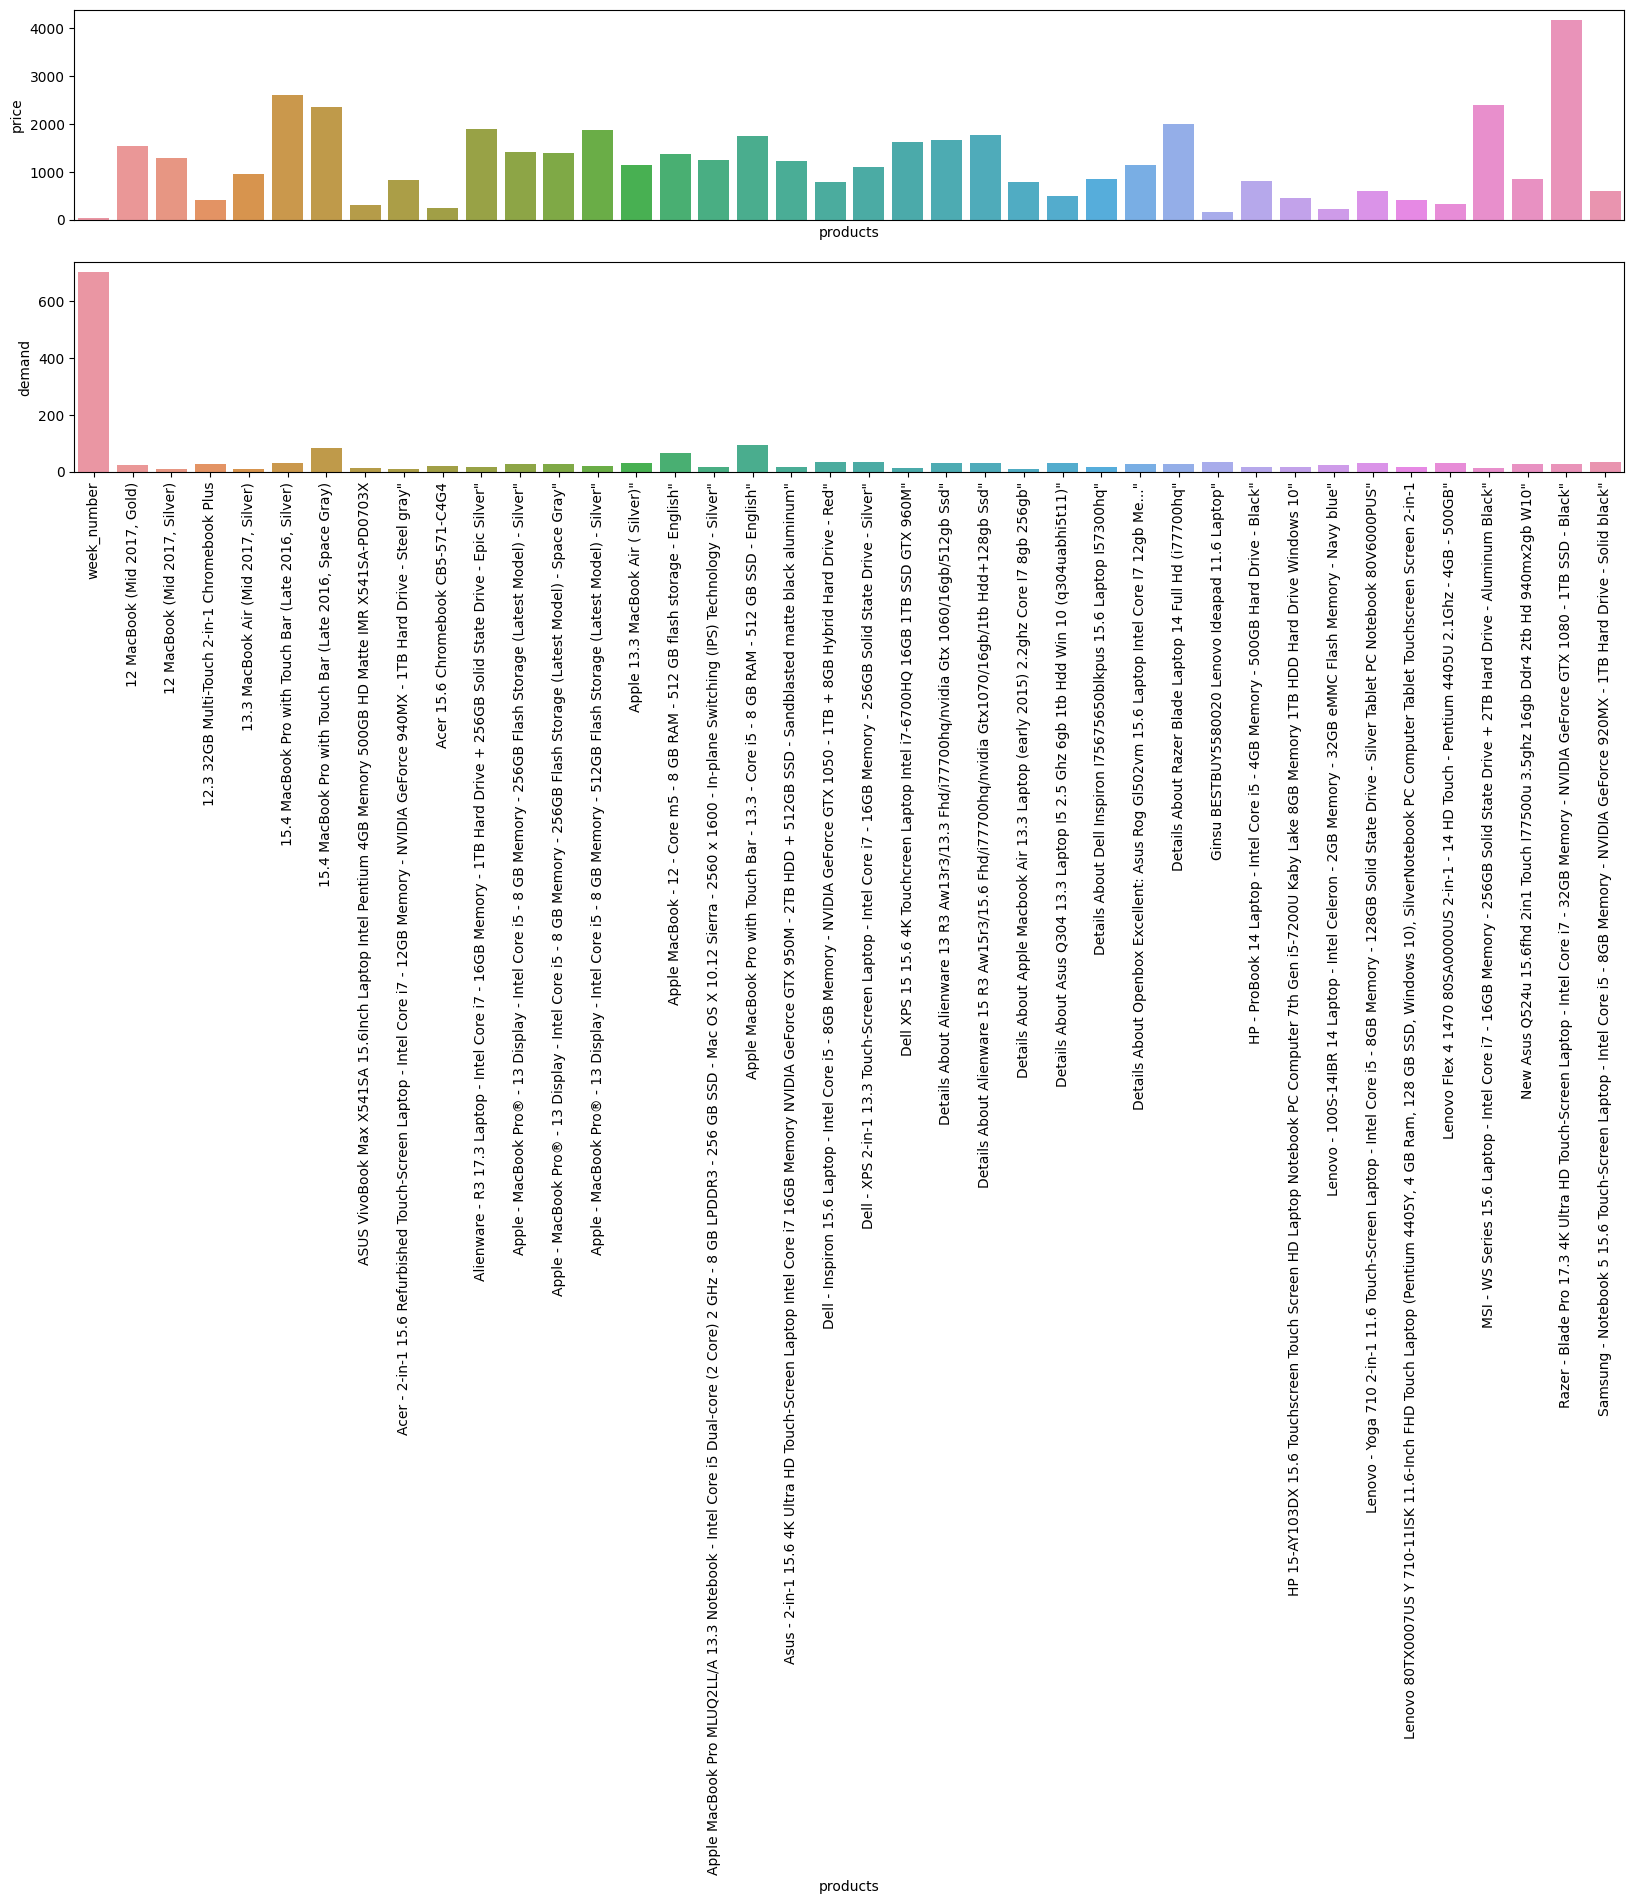

In [99]:
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1)
aux1 = pd.DataFrame(x_price.apply( lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
sns.barplot(x='products', y='price', data=aux1)
plt.xticks([])

plt.subplot(2, 1, 2)
aux2 = pd.DataFrame(y_demand.apply( lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
plt.xticks(rotation=90)
sns.barplot(x='products', y='demand', data=aux2)

In [102]:
a =   ['12 MacBook (Mid 2017, Gold)', '12 MacBook (Mid 2017, Silver)',
       '12.3 32GB Multi-Touch 2-in-1 Chromebook Plus',
       '13.3 MacBook Air (Mid 2017, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)',
       'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X',
       'Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"',
       'Acer 15.6 Chromebook CB5-571-C4G4',
       'Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver"',
       'Apple 13.3 MacBook Air ( Silver)"',
       'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English"',
       'Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver"',
       'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"',
       'Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum"',
       'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"',
       'Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver"',
       'Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M"',
       'Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"',
       'Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"',
       'Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"',
       'Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)"',
       'Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq"',
       'Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me..."',
       'Details About Razer Blade Laptop 14 Full Hd (i77700hq"',
       'Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"',
       'HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"',
       'HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"',
       'Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue"',
       'Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS"',
       'Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1',
       'Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"',
       'MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"',
       'New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10"',
       'Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"',
       'Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"']

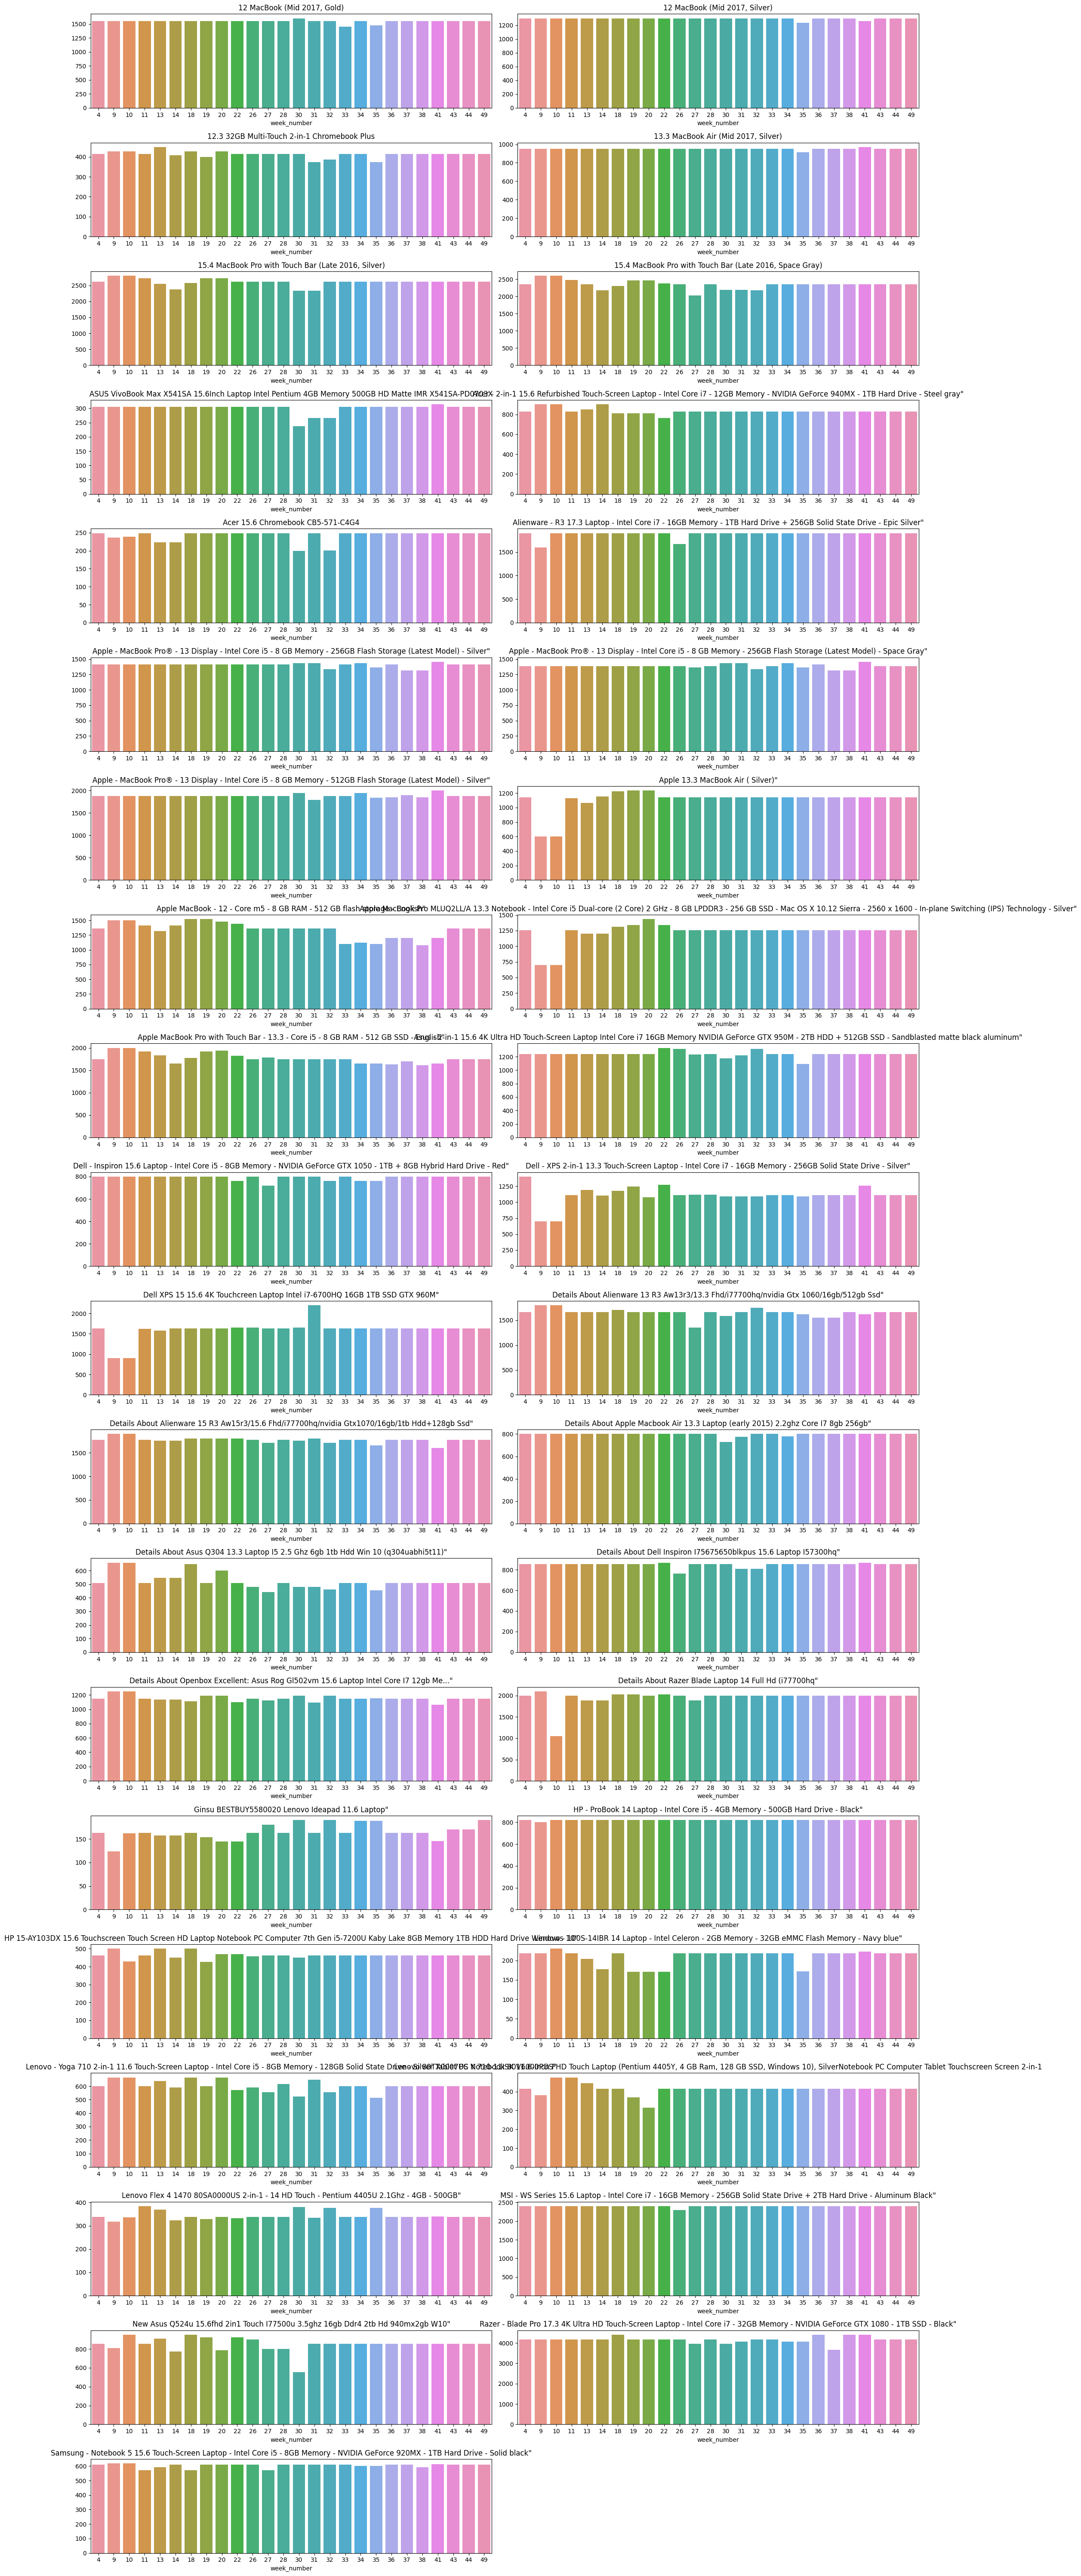

In [103]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(x_price.columns), 1):
    plt.subplot(20,2,k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()